#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(938, 473, 3)


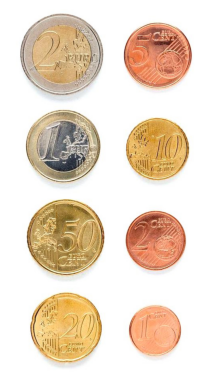

In [3]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

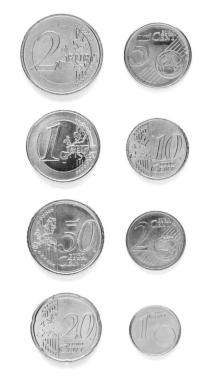

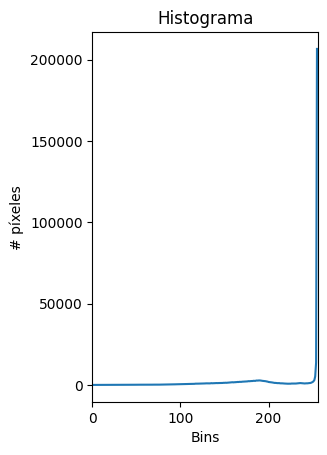

In [4]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

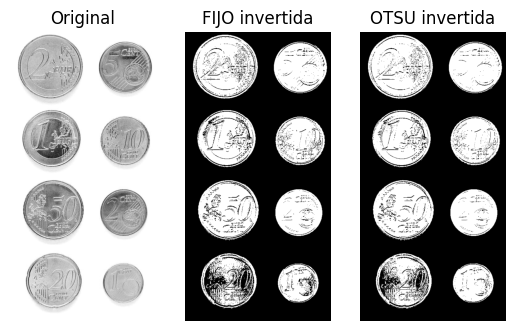

In [5]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Area:  12740.0 , Perim:  600.4995620250702 , Rect:  ((366.5, 815.0), (126.0, 131.0), 90.0) , CX:  366.4169616699219 , CY:  814.4717407226562 , Radio:  65.74199676513672 , Elipse:  ((366.64166259765625, 814.06298828125), (125.09832000732422, 130.85784912109375), 86.78424072265625)
Area:  24682.5 , Perim:  643.7127649784088 , Rect:  ((141.0, 806.5), (175.0, 180.0), 90.0) , CX:  141.45033264160156 , CY:  807.0255126953125 , Radio:  90.4556655883789 , Elipse:  ((141.7595672607422, 807.3490600585938), (175.33294677734375, 179.72752380371094), 83.83692932128906)
Area:  17854.5 , Perim:  503.83051443099976 , Rect:  ((368.5, 587.0), (150.0, 151.0), 90.0) , CX:  368.2776184082031 , CY:  586.7313842773438 , Radio:  76.19898223876953 , Elipse:  ((368.3255615234375, 586.7984008789062), (150.0564727783203, 151.56260681152344), 91.99696350097656)
Area:  29172.5 , Perim:  675.1686074733734 , Rect:  ((140.35000610351562, 577.9500122070312), (195.4287567138672, 191.31777954101562), 18.434947967529297) 

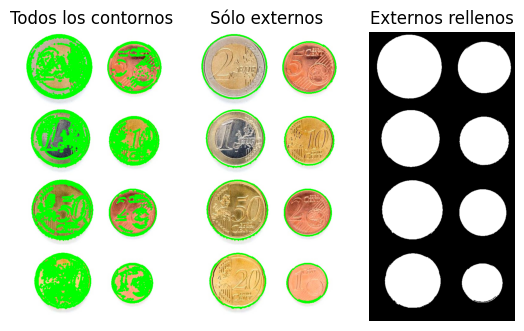

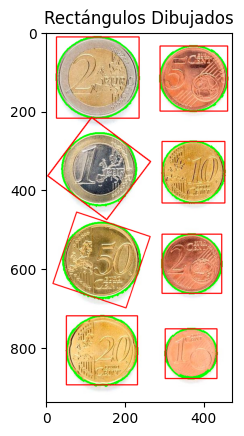

In [6]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro del contorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        
        
        # Obtiene los puntos del rectángulo
        box = cv2.boxPoints(rect)
        box = np.intp(box)

        # Dibuja el rectángulo sobre la imagen
        cv2.drawContours(img_rgb, [box], 0, (255,0,0), 2)  # Rectángulo se dibujará en azul


        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            # print(area, perimetro, rect, cx,cy,radio, elipse)
            print("Area: ", area, 
                  ", Perim: ", perimetro, 
                  ", Rect: ", rect, 
                  ", CX: ", cx,
                  ", CY: ", cy, 
                  ", Radio: ", radio,
                  ", Elipse: ", elipse) 
        

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

               
plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


# Visualiza la imagen con rectángulos
plt.imshow(img_rgb)
plt.title('Rectángulos Dibujados')
plt.show()


In [14]:
# Diccionario de monedas y diámetros
monedas_diametro = {
    "1 Cent": 16.25,
    "2 Cent": 18.75,
    "5 Cent": 21.25,
    "10 Cent": 19.75,
    "20 Cent": 22.25,
    "50 Cent": 24.25,
    "1 Euro": 23.25,
    "2 Euro": 25.75
}

# Imprime las opciones de monedas disponibles
print("Monedas disponibles:")
opciones = list(monedas_diametro.keys())
for idx, moneda in enumerate(opciones, 1):
    print(f"{idx}.-{moneda}")

# Solicita al usuario seleccionar una moneda
try:
    seleccion = int(input("Por favor, introduce el número correspondiente a una moneda de la lista: "))
    moneda_seleccionada = opciones[seleccion - 1]  # Ajusta el índice ya que la lista comienza en 1
    # Imprime el diámetro de la moneda seleccionada
    print(f"El diámetro de {moneda_seleccionada} es: {monedas_diametro[moneda_seleccionada]} mm")
except (ValueError, IndexError):  # Maneja tanto la entrada no numérica como índices fuera de rango
    # Imprime un mensaje de error si la entrada no es válida
    print("Entrada no válida. Por favor, introduce un número válido correspondiente a una moneda de la lista.")


Monedas disponibles:
1. 1 Cent
2. 2 Cent
3. 5 Cent
4. 10 Cent
5. 20 Cent
6. 50 Cent
7. 1 Euro
8. 2 Euro
El diámetro de 10 Cent es: 19.75 mm


Moneda 1 - Color Medio HSV: (20.0, 69.0, 217.0, 0.0)


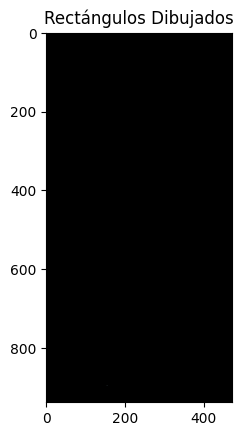

Moneda 2 - Color Medio HSV: (21.0, 68.2, 211.20000000000002, 0.0)


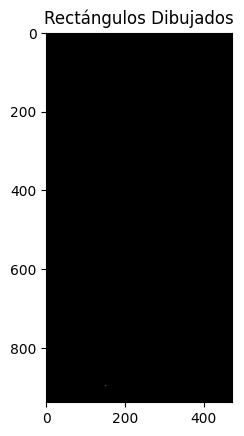

Moneda 3 - Color Medio HSV: (16.333333333333332, 72.66666666666666, 214.66666666666666, 0.0)


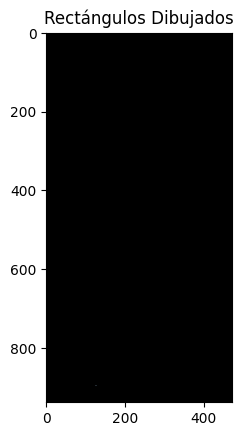

Moneda 4 - Color Medio HSV: (17.0, 93.0, 230.0, 0.0)


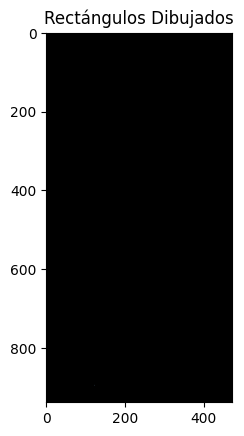

Moneda 5 - Color Medio HSV: (14.5, 94.5, 234.5, 0.0)


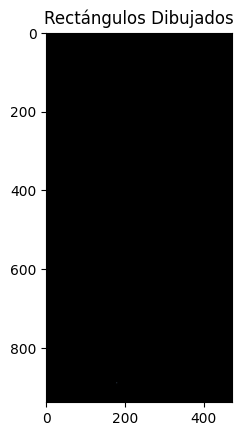

Moneda 6 - Color Medio HSV: (16.0, 87.0, 231.0, 0.0)


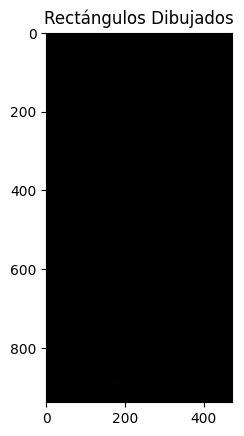

Moneda 7 - Color Medio HSV: (17.8, 83.80000000000001, 220.4, 0.0)


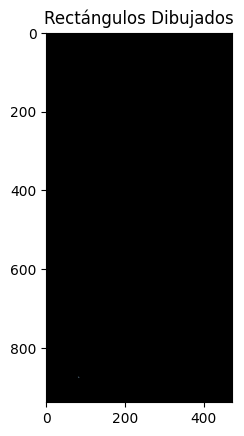

Moneda 8 - Color Medio HSV: (10.93484114162628, 123.98807600584661, 245.65689668436033, 0.0)


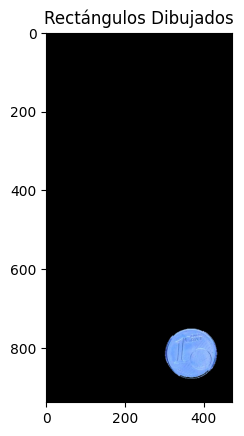

Moneda 9 - Color Medio HSV: (19.58084935897436, 142.8647435897436, 229.90973557692308, 0.0)


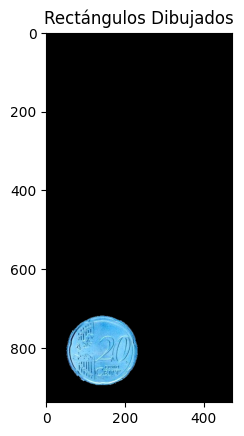

Moneda 10 - Color Medio HSV: (20.0, 75.0, 213.0, 0.0)


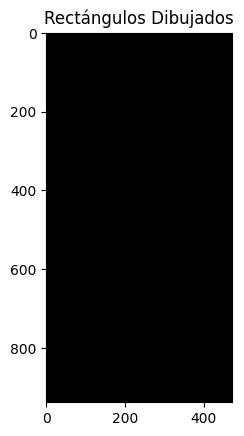

Moneda 11 - Color Medio HSV: (17.5, 76.75, 221.25, 0.0)


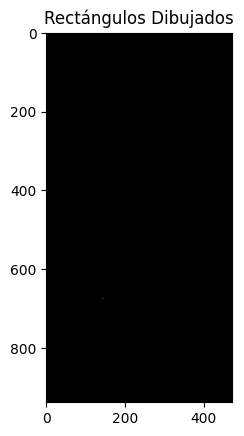

Moneda 12 - Color Medio HSV: (22.5, 71.0, 213.5, 0.0)


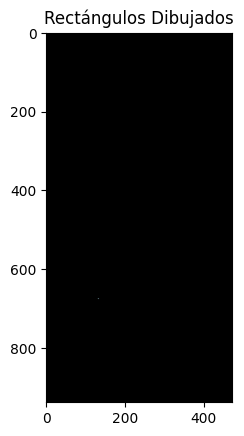

Moneda 13 - Color Medio HSV: (19.0, 74.0, 211.33333333333331, 0.0)


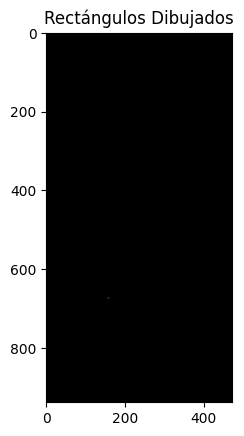

Moneda 14 - Color Medio HSV: (23.0, 70.0, 208.0, 0.0)


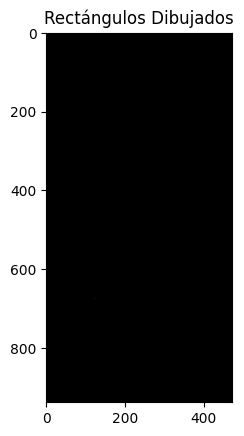

Moneda 15 - Color Medio HSV: (22.0, 58.0, 208.0, 0.0)


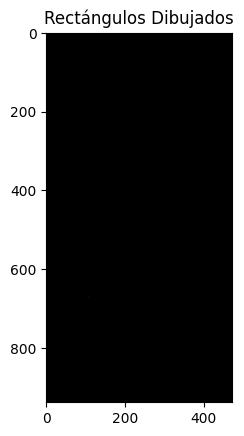

Moneda 16 - Color Medio HSV: (15.75, 78.0, 220.5, 0.0)


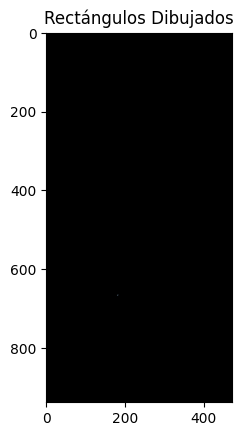

Moneda 17 - Color Medio HSV: (18.0, 64.0, 206.0, 0.0)


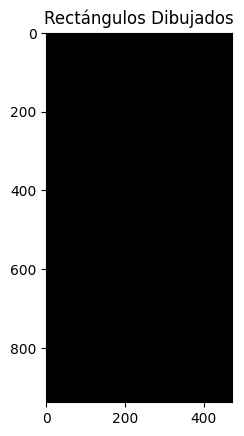

Moneda 18 - Color Medio HSV: (21.0, 38.666666666666664, 207.33333333333331, 0.0)


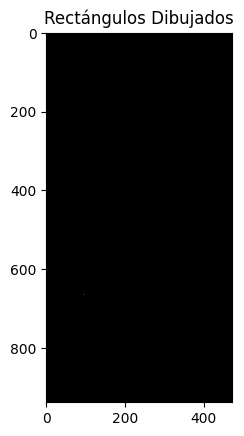

Moneda 19 - Color Medio HSV: (20.0, 58.0, 214.0, 0.0)


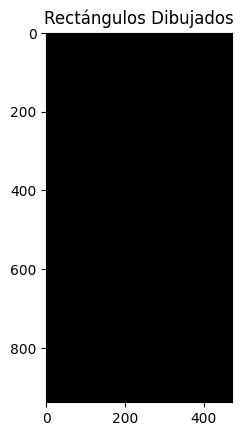

Moneda 20 - Color Medio HSV: (18.0, 76.5, 213.0, 0.0)


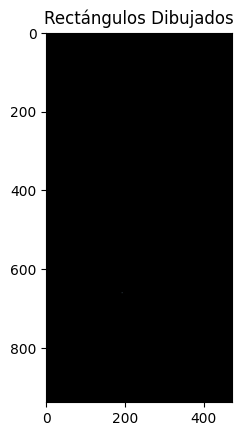

Moneda 21 - Color Medio HSV: (19.666666666666664, 60.666666666666664, 211.66666666666666, 0.0)


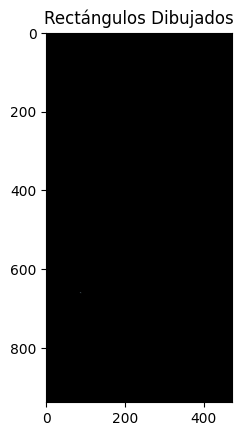

Moneda 22 - Color Medio HSV: (22.0, 71.5, 206.0, 0.0)


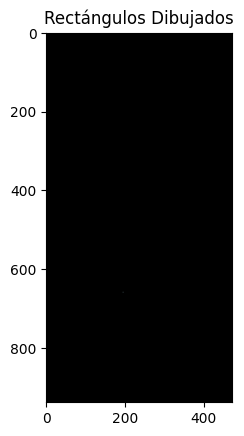

Moneda 23 - Color Medio HSV: (19.5, 55.5, 211.0, 0.0)


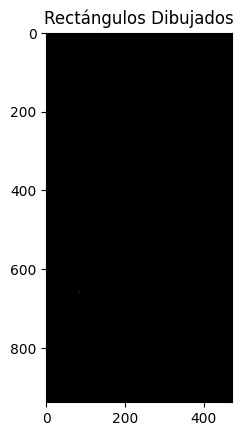

Moneda 24 - Color Medio HSV: (17.0, 65.0, 195.0, 0.0)


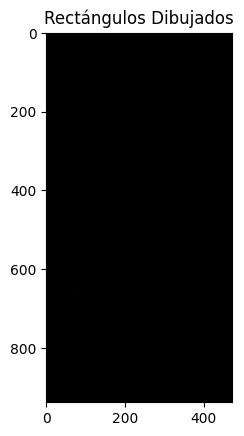

Moneda 25 - Color Medio HSV: (16.666666666666664, 65.66666666666666, 215.0, 0.0)


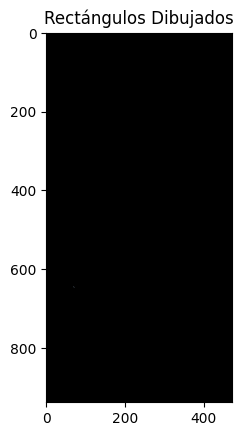

Moneda 26 - Color Medio HSV: (15.0, 51.0, 217.0, 0.0)


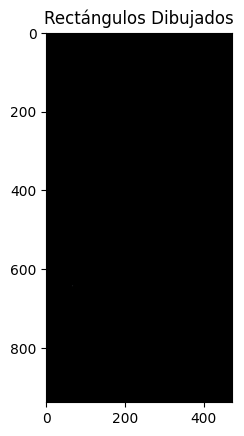

Moneda 27 - Color Medio HSV: (18.0, 75.0, 210.0, 0.0)


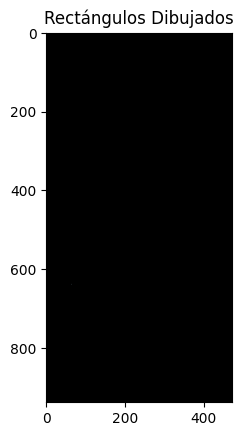

Moneda 28 - Color Medio HSV: (8.280046480743692, 145.3738933156264, 209.0479747675963, 0.0)


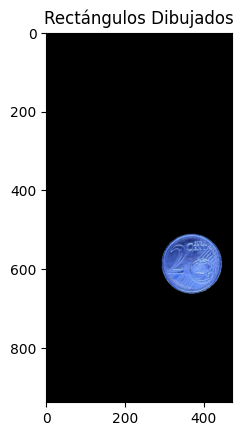

Moneda 29 - Color Medio HSV: (19.806191025728054, 139.18481433711221, 184.02304663634513, 0.0)


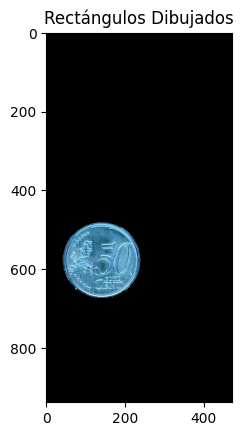

Moneda 30 - Color Medio HSV: (20.0, 48.0, 213.0, 0.0)


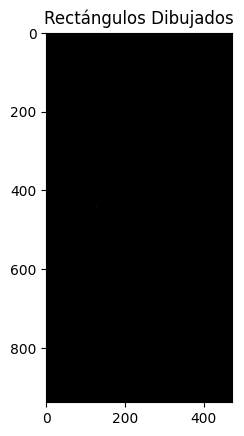

Moneda 31 - Color Medio HSV: (17.0, 50.0, 215.0, 0.0)


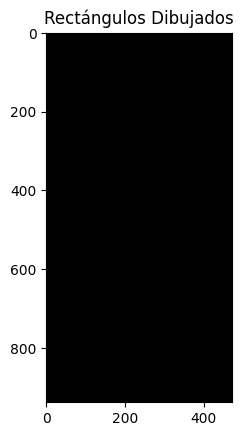

Moneda 32 - Color Medio HSV: (12.0, 27.0, 206.0, 0.0)


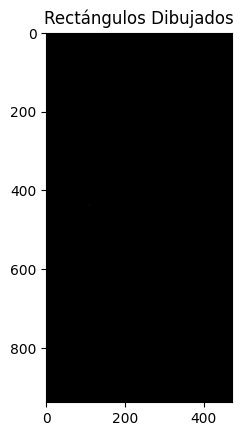

Moneda 33 - Color Medio HSV: (19.0, 56.0, 215.0, 0.0)


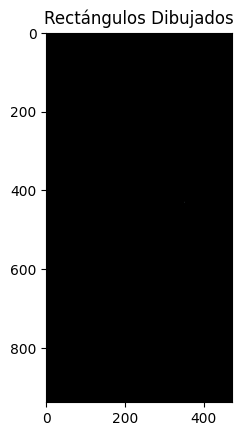

Moneda 34 - Color Medio HSV: (22.0, 32.0, 207.0, 0.0)


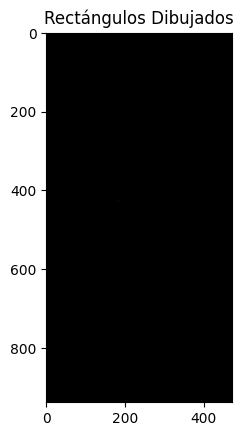

Moneda 35 - Color Medio HSV: (17.0, 38.0, 211.0, 0.0)


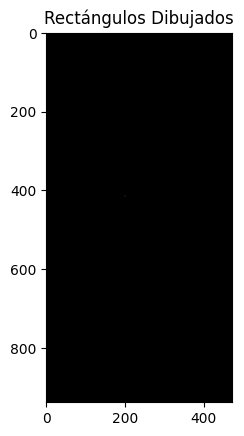

Moneda 36 - Color Medio HSV: (18.610515569167944, 158.43583460949463, 213.02235834609496, 0.0)


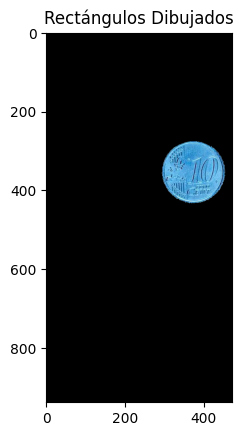

Moneda 37 - Color Medio HSV: (37.4321498503713, 50.23412273247866, 161.58994347360255, 0.0)


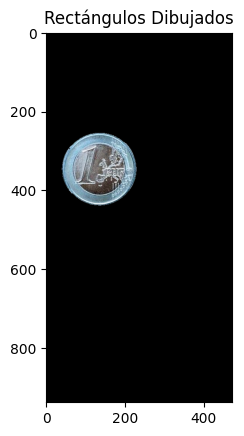

Moneda 38 - Color Medio HSV: (8.0, 19.0, 202.0, 0.0)


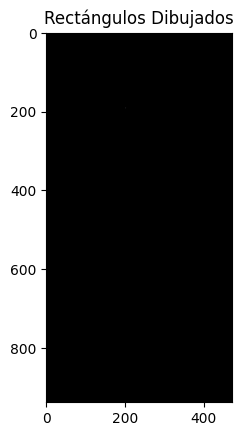

Moneda 39 - Color Medio HSV: (177.0, 11.0, 202.0, 0.0)


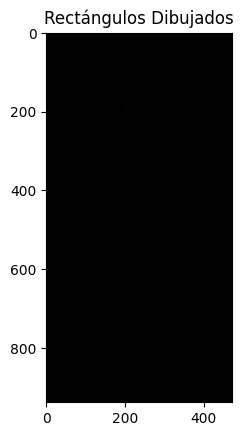

Moneda 40 - Color Medio HSV: (0.0, 8.0, 204.0, 0.0)


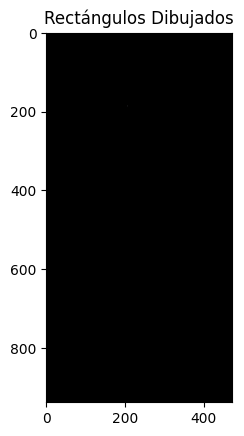

Moneda 41 - Color Medio HSV: (12.0, 70.0, 228.0, 0.0)


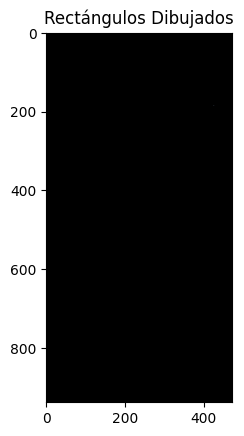

Moneda 42 - Color Medio HSV: (8.0, 63.0, 229.5, 0.0)


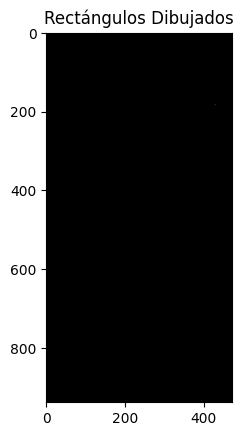

Moneda 43 - Color Medio HSV: (19.0, 10.0, 199.0, 0.0)


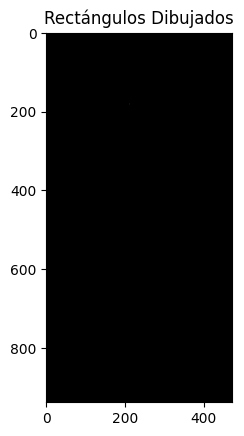

Moneda 44 - Color Medio HSV: (13.0, 69.0, 228.0, 0.0)


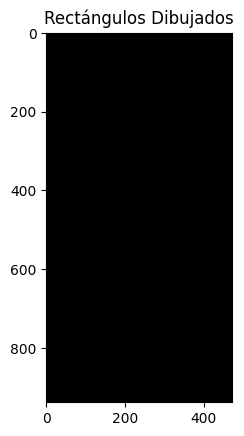

Moneda 45 - Color Medio HSV: (11.0, 82.0, 222.0, 0.0)


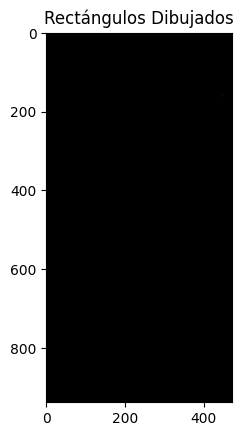

Moneda 46 - Color Medio HSV: (19.0, 55.0, 207.0, 0.0)


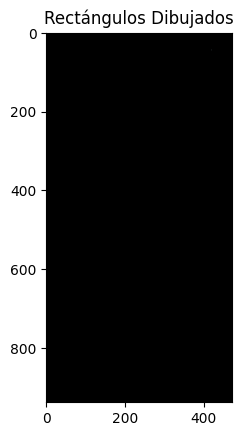

Moneda 47 - Color Medio HSV: (8.5893536121673, 140.55446208901813, 212.18689331245807, 0.0)


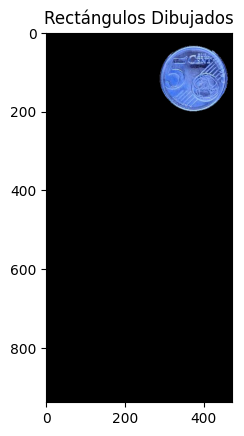

Moneda 48 - Color Medio HSV: (16.44691437993169, 73.99938169826876, 199.88655635378637, 0.0)


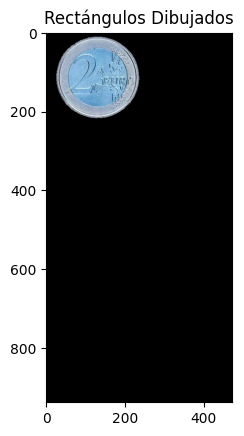

In [12]:
import cv2
import numpy as np

# Asumiendo que tienes la imagen original cargada como 'img'
# y los contornos obtenidos como 'contornos2'

# Convertir la imagen a espacio de color HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



# Iterar sobre los contornos de las monedas
for i, c in enumerate(contornos2):
    # Crear una máscara negra del tamaño de la imagen
    mask = np.zeros_like(img_hsv)
    
    # Dibujar el contorno lleno (rellenado) en la máscara
    cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
    
    # Aplicar la máscara a la imagen HSV
    masked_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask[:,:,0])
    
    # Calcular el color medio HSV en la región de la máscara
    mean_hsv = cv2.mean(masked_hsv, mask=mask[:,:,0])
    x
    # Imprimir o mostrar el valor medio HSV
    print(f"Moneda {i+1} - Color Medio HSV: {mean_hsv}")

    # Para visualización, mostrar la región de la moneda con el color medio calculado
    # Este paso es opcional y solo para tu referencia visual
    masked_bgr = cv2.cvtColor(masked_hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow(f"Moneda {i+1}", masked_bgr)

    # Cerrar todas las ventanas de visualización
    plt.imshow(masked_bgr)
    plt.title('Rectángulos Dibujados')
    plt.show()
# cv2.destroyAllWindows()


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

In [17]:
valorGauss=1
valorKernel=7

original=cv2.imread('Monedas.jpg')
gris=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
gauss=cv2.GaussianBlur(gris, (valorGauss,valorGauss), 0)
canny=cv2.Canny(gauss, 60,100)
kernel=np.ones((valorKernel,valorKernel),np.uint8)
cierre=cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

contornos, jerarquia=cv2.findContours(cierre.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("monedas encontradas: {}".format(len(contornos)))
cv2.drawContours(original, contornos, -1, (0,0,255),2)
#Mostrar resultados
'''cv2.imshow("Grises",gris)
cv2.imshow("gauss",gauss)
cv2.imshow("canny",canny)
cv2.imshow("cierre",cierre)

cv2.imshow("Resultado", original)
cv2.waitKey(0)
'''

monedas encontradas: 8


'cv2.imshow("Grises",gris)\ncv2.imshow("gauss",gauss)\ncv2.imshow("canny",canny)\ncv2.imshow("cierre",cierre)\n\ncv2.imshow("Resultado", original)\ncv2.waitKey(0)\n'

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


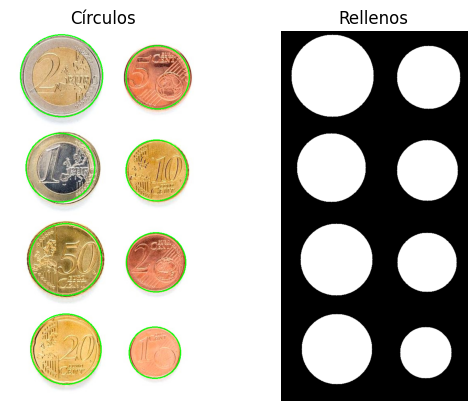

In [19]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




Clasificación de microplásticos

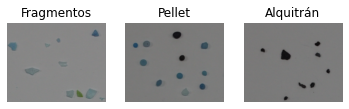

In [10]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

Accuracy (TP/(n))= 0.33
Precision (TP/(TP+FP)) = 0.33209980237154146
Recall (TP/(TP+FN)) = 0.33
F1 Score (2*(precision*recall)/(precision+recall)) = 0.329899414311179


Text(27.5, 0.5, 'Anotada')

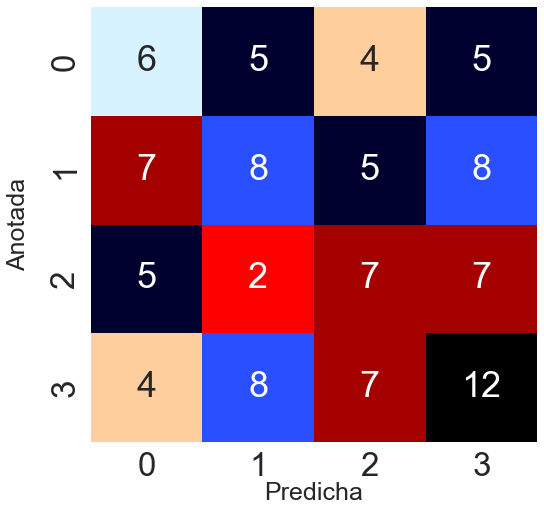

In [15]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)